In [1]:
import time
t0 = time.process_time()
# %matplotlib notebook

In [135]:
# commands as per our convenient
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.colors import LightSource
mpl.style.use('fivethirtyeight')

from mpl_toolkits.mplot3d import Axes3D
import mpld3
mpld3.enable_notebook(True)

# from scipy.stats import norm as Normalize
import scipy.interpolate as inter
from skimage import exposure

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/Satelite_Gravity_73F.csv')
df.shape

(1550, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  1550 non-null   float64
 1   Latitude   1550 non-null   float64
 2   FA         1550 non-null   float64
 3   Elevation  1550 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 48.6 KB


In [6]:
Longitude = df.Longitude.values
Latitude = df.Latitude.values
Z = df.Elevation.values
FAA = df.FA.values

In [7]:
# BC = 0.04192 * elevation * density  // BC in mgal, elevation in meters, density in gram/cc
Rho = 2.67  
# average density of earth crust around 2.67 gram/cc
BC = 0.04192 * Z * Rho
# Bougure correction
BA = FAA - BC
# assigning to the dataframe
df = df.assign(BA = BA)
df.head()

,Longitude,Latitude,FA,Elevation,BA
0,85.0083,22.9981,22.9,533,-36.756771
1,85.0250,22.9981,23.2,547,-38.023741
2,85.0417,22.9981,23.7,539,-36.628330
3,85.0583,22.9981,24.2,523,-34.337507
4,85.0750,22.9981,24.5,523,-34.037507


In [8]:
df.describe()

,Longitude,Latitude,FA,Elevation,BA
count,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000
mean,85.258332,22.621512,19.203226,412.771613,-26.996815
std,0.149120,0.222085,12.178407,114.022240,6.349294
min,85.008300,22.244200,-8.200000,199.000000,-56.298934
25%,85.125000,22.429200,10.500000,319.000000,-30.962734
50%,85.258300,22.621700,18.100000,406.000000,-26.842573
75%,85.391700,22.813900,26.675000,507.000000,-22.805669
max,85.508300,22.998100,48.900000,721.000000,-9.522877


In [136]:
# distplot() is used for univariate analysis i.e. applicable to check/plot one feature at time in histograms 

# importing normal distubution pacakge and see how ideal normal dist for given data and actual distbution(by given data)

sns.histplot(df.BA, bins=100, kde=True, stat='density')

<AxesSubplot:title={'center':'Simple Bouguer Anomaly'}, xlabel='Longitude', ylabel='Latitude'>

In [10]:
# xmin = Longitude.min()
# xmax = Longitude.max()
# ymin = Latitude.min()
# ymax = Latitude.max()
xmin = 85.00
xmax = 85.50
ymin = 22.25
ymax = 23.00

In [11]:
((Longitude.max() - Longitude.min()) * 111139) / 500

111.139

In [12]:
((Latitude.max() - Latitude.min()) * 111139) / 500

167.57538420000034

In [13]:
ngrid = 200 #can be set up freely depend on smoother (and heavier process) result
long_grid= np.linspace(xmin, xmax, 111)
lat_grid= np.linspace(ymin, ymax, 167)
x,y = np.meshgrid(long_grid, lat_grid)

In [14]:
#interpolate using Radial Basis Function
Bouguer_interpolation = inter.Rbf(Longitude,Latitude,BA,method='gaussian')
BA_grid = Bouguer_interpolation(x,y)

In [16]:
mycolors_geosoft =   [[ 0.        ,  0.        ,  1.        ],
               [ 0.        ,  0.05882353,  1.        ],
               [ 0.        ,  0.10980392,  1.        ],
               [ 0.        ,  0.21960784,  1.        ],
               [ 0.        ,  0.33333333,  1.        ],
               [ 0.        ,  0.39215686,  1.        ],
               [ 0.        ,  0.44705882,  1.        ],
               [ 0.        ,  0.49803922,  1.        ],
               [ 0.        ,  0.55294118,  1.        ],
               [ 0.        ,  0.60784314,  1.        ],
               [ 0.        ,  0.66666667,  1.        ],
               [ 0.        ,  0.7254902 ,  1.        ],
               [ 0.        ,  0.78039216,  1.        ],
               [ 0.        ,  0.82745098,  1.        ],
               [ 0.        ,  0.85882353,  1.        ],
               [ 0.        ,  0.88627451,  1.        ],
               [ 0.        ,  0.91372549,  1.        ],
               [ 0.        ,  0.94509804,  1.        ],
               [ 0.        ,  0.97254902,  1.        ],
               [ 0.        ,  0.98823529,  1.        ],
               [ 0.        ,  1.        ,  1.        ],
               [ 0.        ,  1.        ,  0.8627451 ],
               [ 0.        ,  1.        ,  0.78431373],
               [ 0.        ,  1.        ,  0.71372549],
               [ 0.        ,  1.        ,  0.63921569],
               [ 0.        ,  1.        ,  0.56862745],
               [ 0.        ,  1.        ,  0.4627451 ],
               [ 0.        ,  1.        ,  0.34901961],
               [ 0.        ,  1.        ,  0.24705882],
               [ 0.        ,  1.        ,  0.22745098],
               [ 0.        ,  1.        ,  0.21176471],
               [ 0.        ,  1.        ,  0.18823529],
               [ 0.        ,  1.        ,  0.17647059],
               [ 0.        ,  1.        ,  0.15686275],
               [ 0.        ,  1.        ,  0.14117647],
               [ 0.        ,  1.        ,  0.09411765],
               [ 0.        ,  1.        ,  0.04705882],
               [ 0.        ,  1.        ,  0.        ],
               [ 0.09411765,  1.        ,  0.        ],
               [ 0.18823529,  1.        ,  0.        ],
               [ 0.28235294,  1.        ,  0.        ],
               [ 0.31764706,  1.        ,  0.        ],
               [ 0.34901961,  1.        ,  0.        ],
               [ 0.38431373,  1.        ,  0.        ],
               [ 0.4       ,  1.        ,  0.        ],
               [ 0.41176471,  1.        ,  0.        ],
               [ 0.44705882,  1.        ,  0.        ],
               [ 0.49019608,  1.        ,  0.        ],
               [ 0.52941176,  1.        ,  0.        ],
               [ 0.56862745,  1.        ,  0.        ],
               [ 0.61568627,  1.        ,  0.        ],
               [ 0.6627451 ,  1.        ,  0.        ],
               [ 0.71372549,  1.        ,  0.        ],
               [ 0.76078431,  1.        ,  0.        ],
               [ 0.80784314,  1.        ,  0.        ],
               [ 0.85490196,  1.        ,  0.        ],
               [ 0.90588235,  1.        ,  0.        ],
               [ 0.95294118,  1.        ,  0.        ],
               [ 0.97647059,  1.        ,  0.        ],
               [ 1.        ,  1.        ,  0.        ],
               [ 1.        ,  0.95686275,  0.        ],
               [ 1.        ,  0.91372549,  0.        ],
               [ 1.        ,  0.88627451,  0.        ],
               [ 1.        ,  0.85882353,  0.        ],
               [ 1.        ,  0.82745098,  0.        ],
               [ 1.        ,  0.80392157,  0.        ],
               [ 1.        ,  0.77647059,  0.        ],
               [ 1.        ,  0.75294118,  0.        ],
               [ 1.        ,  0.7372549 ,  0.        ],
               [ 1.        ,  0.72156863,  0.        ],
               [ 1.        ,  0.70196078,  0.        ],
               [ 1.        ,  0.69411765,  0.        ],
               [ 1.        ,  0.68235294,  0.        ],
               [ 1.        ,  0.66666667,  0.        ],
               [ 1.        ,  0.63921569,  0.        ],
               [ 1.        ,  0.61176471,  0.        ],
               [ 1.        ,  0.57647059,  0.        ],
               [ 1.        ,  0.56862745,  0.        ],
               [ 1.        ,  0.55294118,  0.        ],
               [ 1.        ,  0.5372549 ,  0.        ],
               [ 1.        ,  0.5254902 ,  0.        ],
               [ 1.        ,  0.51372549,  0.        ],
               [ 1.        ,  0.49803922,  0.        ],
               [ 1.        ,  0.47058824,  0.        ],
               [ 1.        ,  0.44313725,  0.        ],
               [ 1.        ,  0.41176471,  0.        ],
               [ 1.        ,  0.38431373,  0.        ],
               [ 1.        ,  0.36078431,  0.        ],
               [ 1.        ,  0.33333333,  0.        ],
               [ 1.        ,  0.29019608,  0.        ],
               [ 1.        ,  0.25098039,  0.        ],
               [ 1.        ,  0.20784314,  0.        ],
               [ 1.        ,  0.16470588,  0.        ],
               [ 1.        ,  0.1254902 ,  0.        ],
               [ 1.        ,  0.08235294,  0.        ],
               [ 1.        ,  0.05490196,  0.        ],
               [ 1.        ,  0.02745098,  0.        ],
               [ 1.        ,  0.        ,  0.        ],
               [ 1.        ,  0.        ,  0.02352941],
               [ 1.        ,  0.        ,  0.05098039],
               [ 1.        ,  0.        ,  0.06666667],
               [ 1.        ,  0.        ,  0.09411765],
               [ 1.        ,  0.        ,  0.11764706],
               [ 1.        ,  0.        ,  0.14117647],
               [ 1.        ,  0.        ,  0.20392157],
               [ 1.        ,  0.        ,  0.26666667],
               [ 1.        ,  0.        ,  0.32941176],
               [ 1.        ,  0.        ,  0.39215686],
               [ 1.        ,  0.03529412,  0.45490196],
               [ 1.        ,  0.07058824,  0.51372549],
               [ 1.        ,  0.11372549,  0.58039216],
               [ 1.        ,  0.15294118,  0.64313725],
               [ 1.        ,  0.18823529,  0.70588235],
               [ 1.        ,  0.22745098,  0.77254902],
               [ 1.        ,  0.27058824,  0.83529412],
               [ 1.        ,  0.30980392,  0.89019608],
               [ 1.        ,  0.34901961,  0.94509804],
               [ 1.        ,  0.38431373,  1.        ],
               [ 1.        ,  0.42745098,  1.        ],
               [ 1.        ,  0.46666667,  1.        ],
               [ 1.        ,  0.50588235,  1.        ],
               [ 1.        ,  0.54509804,  1.        ],
               [ 1.        ,  0.58039216,  1.        ],
               [ 1.        ,  0.62352941,  1.        ],
               [ 1.        ,  0.6627451 ,  1.        ],
               [ 1.        ,  0.70196078,  1.        ],
               [ 1.        ,  0.74117647,  1.        ],
               [ 1.        ,  0.76078431,  1.        ]]
mycolors_geosoft = np.array(mycolors_geosoft)
type(mycolors_geosoft), mycolors_geosoft.shape

(numpy.ndarray, (128, 3))

In [18]:
a = pd.DataFrame(BA_grid)
a.describe()
sigma = a.stack().std()  
mean = a.stack().mean()
ticks = [ a.stack().min(), 
         -3*sigma+mean, -2*sigma+mean, -1*sigma+mean, 
         mean, 
         1*sigma+mean, 2*sigma+mean, 3*sigma+mean, 
         a.stack().max()]
ticks

[-60.235758558475936,
 -45.64170727999288,
 -39.41041807020389,
 -33.1791288604149,
 -26.947839650625905,
 -20.716550440836915,
 -14.485261231047923,
 -8.253972021258932,
 -9.185410189095819]

In [111]:
mycmap_geosoft = mpl.colors.LinearSegmentedColormap.from_list('geosoft', mycolors_geosoft)
norm = mpl.colors.Normalize(vmin=BA_grid.min(), vmax=BA_grid.max())
contours_intevals = np.arange(BA_grid.min(), BA_grid.max(), 1)
cm = 1/2.54  # centimeters in inches
xticks = np.round(np.linspace(xmin,xmax,7),2)
yticks = np.round(np.linspace(ymin,ymax,7),2)

In [112]:
xticks, yticks

(array([85.  , 85.08, 85.17, 85.25, 85.33, 85.42, 85.5 ]),
 array([22.25, 22.38, 22.5 , 22.62, 22.75, 22.88, 23.  ]))

In [21]:
Latitude.min(), Latitude.mean()

(22.2442, 22.621512000000006)

In [31]:
# histogram equalization
cdf, bins = exposure.cumulative_distribution(BA_grid.flatten(),nbins=256)
# normalize the input bins to interval (0,1)
bins_norm = (bins - bins.min())/np.float(bins.max() - bins.min())

# calculate new indices by applying the cdf as a function on the old indices
# which are initially regularly spaced. 
old_indices = np.linspace(0,1,len(mycolors_geosoft))
new_indices = np.interp(old_indices,cdf,bins_norm)

# make sure indices start with 0 and end with 1
new_indices[0] = 0.0
new_indices[-1] = 1.0

# remap the color table
cdict_old = {'red': [], 'green': [], 'blue': []}
for i,n in enumerate(old_indices):
    r1, g1, b1 = mycolors_geosoft[i]
    cdict_old['red'].append([n, r1, r1])
    cdict_old['green'].append([n, g1, g1])
    cdict_old['blue'].append([n, b1, b1])
    
# remap the color table
cdict = {'red': [], 'green': [], 'blue': []}
for i,n in enumerate(new_indices):
    r1, g1, b1 = mycolors_geosoft[i]
    cdict['red'].append([n, r1, r1])
    cdict['green'].append([n, g1, g1])
    cdict['blue'].append([n, b1, b1])
    
mycmap_geosoft = mpl.colors.LinearSegmentedColormap.from_list('geosoft', mycolors_geosoft)
mycmap_geosoft1 = mpl.colors.LinearSegmentedColormap('Geosoft', cdict_old)
mycmap_geosoft_eql = mpl.colors.LinearSegmentedColormap('Cmap_Equalization', cdict)

<IPython.core.display.Javascript object>


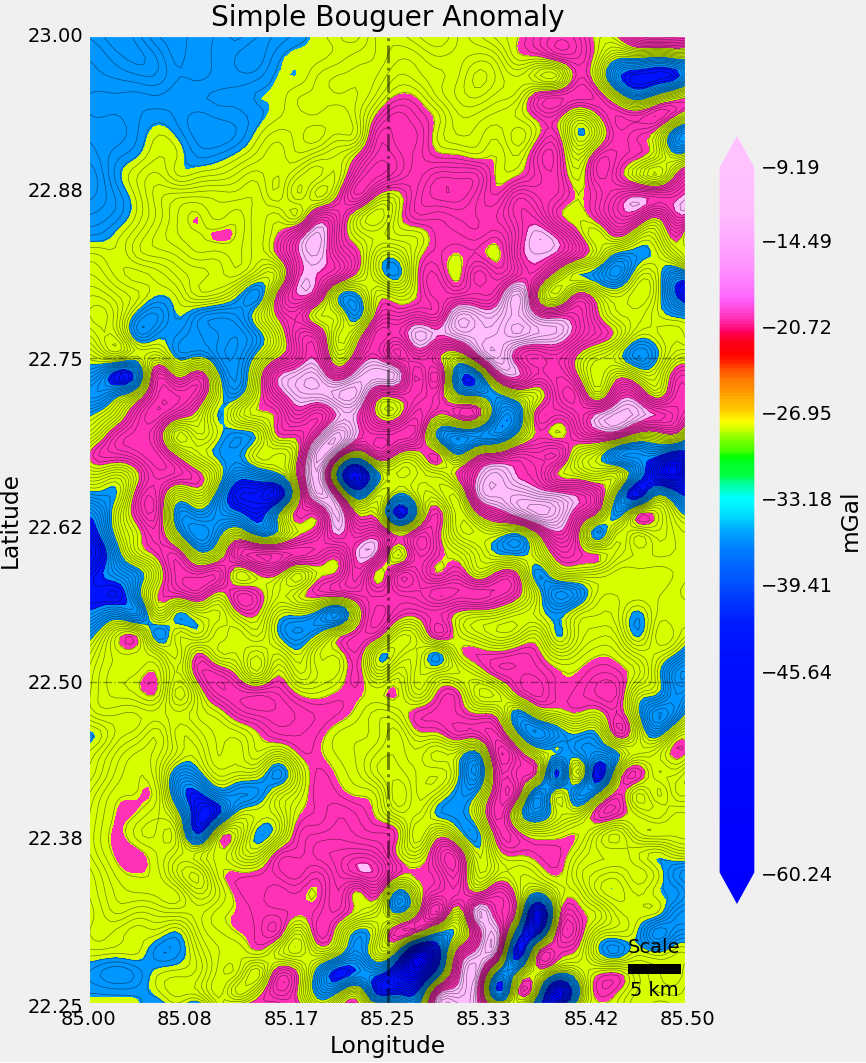

In [139]:

fig, ax = plt.subplots(figsize=(22*cm,27*cm),layout='constrained')
pcm = ax.contourf(x, y, BA_grid, cmap=mycmap_geosoft_eql, norm=norm, shading='auto')
ax.contour(x, y, BA_grid, levels=contours_intevals, linewidths=0.5, colors=[(0,0,0,0.5)], linestyles='solid')

fig.colorbar((mpl.cm.ScalarMappable(norm=norm, cmap=mycmap_geosoft_eql)), 
             ax=ax, ticks=ticks, orientation='vertical',  label='mGal', 
             extend='both', shrink=0.8,pad=0.01/2.54, spacing='proportional')

ax.set_aspect(1 / np.cos(np.deg2rad(Latitude.min())))
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title('Simple Bouguer Anomaly')
ax.set_xlim(xmin=xmin, xmax=xmax)
ax.set_ylim(ymin=ymin, ymax=ymax)
ax.set_xticks(xticks, pad=0.8)
ax.set_yticks(yticks)
ax.hlines(y=[22.50, 22.75], xmin=xmin, xmax=xmax, colors='k', linestyles='dashdot', linewidths=1, alpha=0.4)
ax.vlines(85.25,ymin,ymax, colors='k', linestyles='dashdot', linewidths=2, alpha=0.5)
# Position and layout
scale1 = ScaleBar(dx=((Longitude.max() - Longitude.min()) * 111139 / 500 ) * 1000, 
                  units='m', label='Scale',location='lower right',  
                  label_loc='top', scale_loc='bottom', # in relation to the line
                  color='k',frameon = False, dimension='si-length', length_fraction=0.1 )
ax.add_artist(scale1)
fig.savefig('results_73F\BA.png', dpi=350, bbox_inches='tight', pad_inches=0.2, edgecolor='k', papertype='a4')
plt.show()

<IPython.core.display.Javascript object>


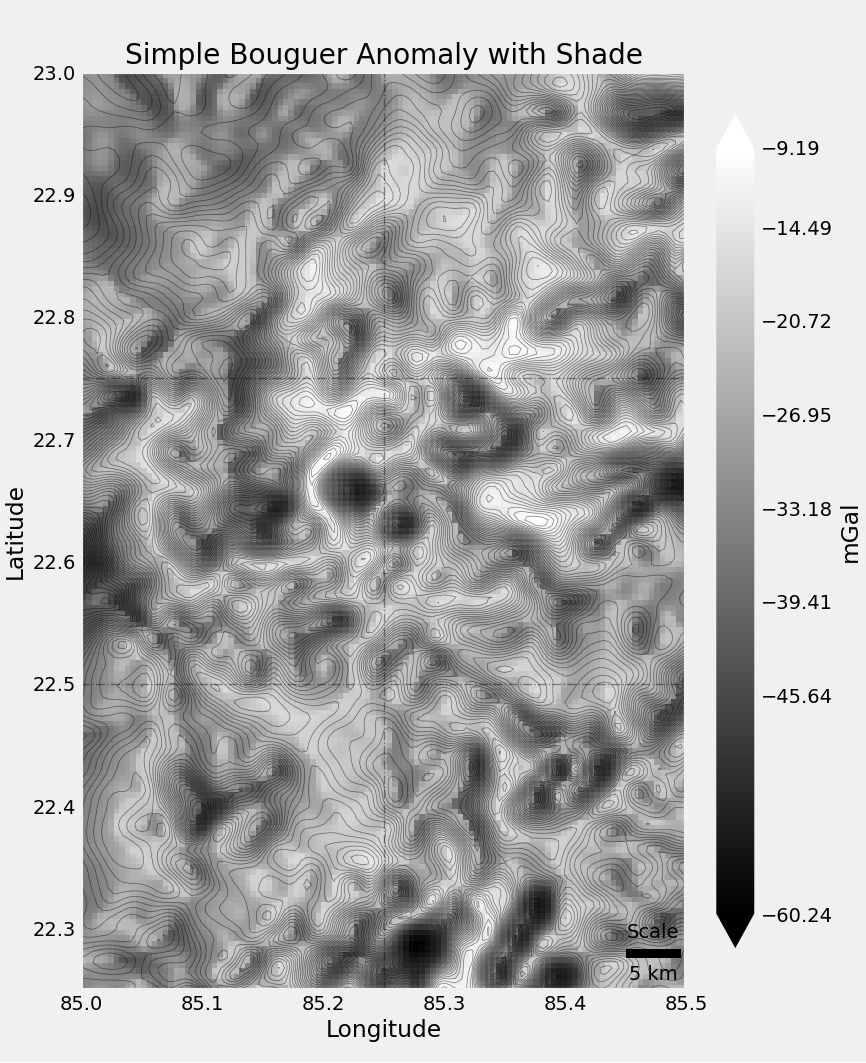

In [144]:

ls = LightSource(azdeg=Longitude.mean(), altdeg=Latitude.mean())
rgb = ls.shade(BA_grid, cmap=mpl.cm.gray, norm= norm , vert_exag=5, blend_mode='overlay', fraction=0.4)

fig1, ax1 = plt.subplots(figsize=(22*cm,27*cm),layout='constrained')
ax1.imshow(rgb, origin='lower', extent=[xmin,xmax,ymin,ymax])
ax1.contour(x, y, BA_grid, levels=contours_intevals, linewidths=0.5, colors=[(0,0,0,0.5)], linestyles='solid')

fig1.colorbar((mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.gray)), 
             ax=ax1, ticks=ticks, orientation='vertical',  label='mGal', 
             extend='both', shrink=0.8,pad=0.01, spacing='proportional')

ax1.set_aspect(1 / np.cos(np.deg2rad(-8.25)))
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.set_title('Simple Bouguer Anomaly with Shade')
ax1.grid(False)
ax1.hlines(y=[22.50, 22.75], xmin=xmin, xmax=xmax, colors='k', linestyles='dashdot', linewidths=1, alpha=0.4)
ax1.vlines(85.25,ymin,ymax, colors='k', linestyles='dashdot', linewidths=1, alpha=0.4)
# Position and layout
scale1 = ScaleBar(dx=((Longitude.max() - Longitude.min()) * 111139 / 500 ) * 1000, 
                  units='m', label='Scale',location='lower right',  
                  label_loc='top', scale_loc='bottom', # in relation to the line
                  color='k',frameon = False, dimension='si-length', length_fraction=0.1 )
ax1.add_artist(scale1)
fig1.savefig('results_73F\BA_Shade.png', dpi=350, bbox_inches='tight', pad_inches=0.2, edgecolor='k', papertype='a4')
plt.show()

<IPython.core.display.Javascript object>


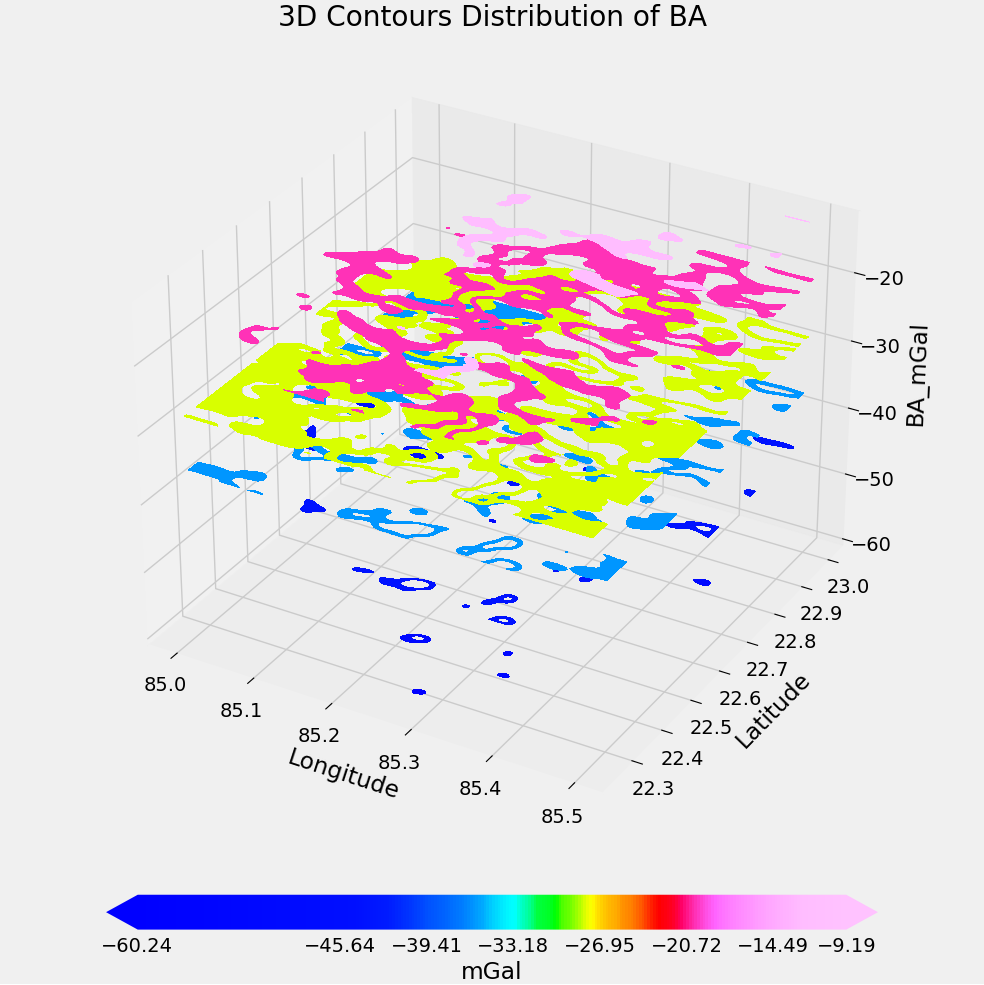

In [149]:
fig2, ax2 = plt.subplots(figsize=(25*cm,25*cm), layout='constrained',subplot_kw=dict(projection='3d'))
surf = ax2.contourf3D(x, y, BA_grid, cmap=mycmap_geosoft_eql, norm=norm)

fig2.colorbar((mpl.cm.ScalarMappable(norm=norm, cmap=mycmap_geosoft_eql)), 
             ax=ax2, ticks=ticks, orientation='horizontal',  label='mGal', 
             extend='both', shrink=0.8,pad=0.05, spacing='proportional')

ax2.set_xlabel("Longitude", labelpad=8)
ax2.set_ylabel("Latitude",labelpad=8)
ax2.set_zlabel("BA_mGal",labelpad=8)
ax2.set_title('3D Contours Distribution of BA')

fig2.savefig('results_73F\BA_3DContours.png', dpi=400, bbox_inches='tight', pad_inches=0.2, edgecolor='k', papertype='a4')

<IPython.core.display.Javascript object>


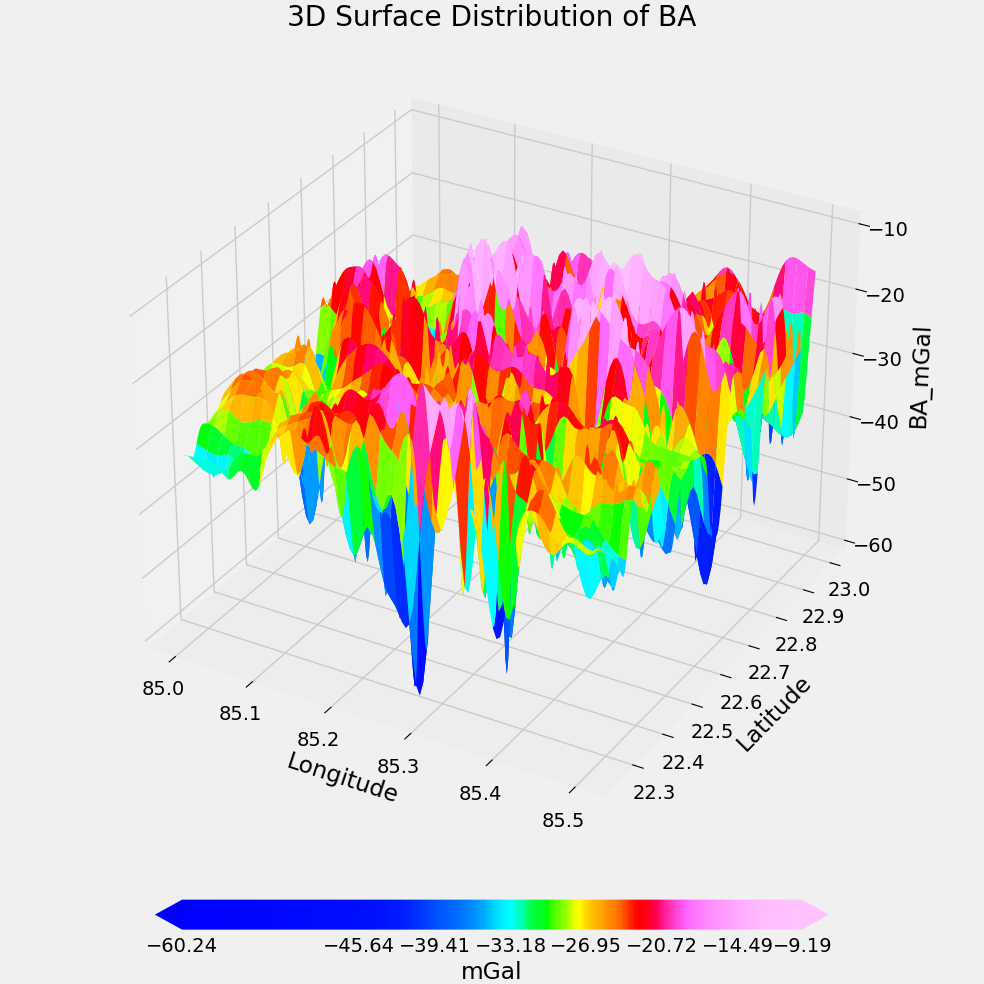

In [150]:
fig3, ax3 = plt.subplots(figsize=(25*cm,25*cm), layout='constrained',subplot_kw=dict(projection='3d'))
surf = ax3.plot_surface(x, y, BA_grid,cmap=mycmap_geosoft_eql, norm=norm)

fig3.colorbar((mpl.cm.ScalarMappable(norm=norm, cmap=mycmap_geosoft_eql)), 
             ax=ax3, ticks=ticks, orientation='horizontal',  label='mGal', 
             extend='both', shrink=0.7,pad=0.05, spacing='proportional')

ax3.set_xlabel("Longitude", labelpad=8)
ax3.set_ylabel("Latitude",labelpad=8)
ax3.set_zlabel("BA_mGal",labelpad=8)
ax3.set_title('3D Surface Distribution of BA')
fig3.savefig('results_73F/BA_3DSurface.png', dpi=400, bbox_inches='tight', pad_inches=0.2, edgecolor='k', papertype='a4')

In [151]:
mpld3.save_html(fig,'results_73F/BA.html')
mpld3.save_html(fig1,'results_73F/BA_shade.html')